# Reporte técnico: Predecir la accidentalidad en Medellín

Integrantes:

- Miguel Angel Bula Carmona
- Dioselin Esteban Brito Peñaloza
- Marcos David Carrillo Builes
- Yeferson Steven Aguilar Alvarado

## Introducción 


La seguridad vial es una preocupación constante en las ciudades de todo el mundo, y Medellín que está en constante crecimiento no es la excepción. La accidentabilidad en las calles de esta ciudad es un tema de importancia con implicaciones en la salud pública y la calidad de vida de sus habitantes. Por lo cual el siguiente trabajo se centrará en afrontar el reto de predecir la accidentalidad vial en Medellín, tomando como punto de partida los datos recopilados a lo largo de los años en relación con los accidentes reportados. Esta tarea es esencial para la formulación de estrategias efectivas orientadas a la prevención y gestión en el tráfico, además de contribuir a la optimización de la planificación urbana y el fortalecimiento de la seguridad vial en la ciudad de Medellín. 

## Metodología

Para el desarrollo o la construcción de un producto que encapsule una posible solución a la problemática descrita, se llevarán a cabo los siguientes pasos:

- Preparación de los datos: Eliminación de columnas con gran cantidad de valores nulos, selección de variables categóricas y continuas. 
    - Análisis de valores nulos 
    - Análisis exploratorio
    - Accidentes por año
    - Clase de accidente
    - Diseño
    - Gravedad del accidente
    - Número de comuna
    - Comuna
    - Clase de accidente por comuna
    - Diseño y clase de accidente
    - Fechas accidentes
    - Accidentalidad por mes
    - Accidentalidad por año
    - Accidentalidad por días de la semana
    - Accidentalidad por horas del día
    - Localización
    - Nivel de accidentalidad diferenciado por comunas y corregimientos
- Entrenamiento del Modelo Predictivo - Diario
- Entrenamiento del Modelo Predictivo - Mensual
- Entrenamiento del Modelo Predictivo - Semanal


## Desarrollo

### Preparación de los datos

In [37]:
import pandas as pd
import missingno as msno
import seaborn as sns
import re
import holidays
import folium
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

co_holidays = holidays.Colombia()

Se lee el archivo CSV 'incidentes_viales.csv' con punto y coma (;) como delimitador y mostramos las primeras filas del DataFrame para inspeccionar los datos.


Tabla 1. Visualización de los datos del archivo CSV 'incidentes_viales.csv'. 

In [38]:
df = pd.read_csv('incidentes_viales.csv',sep=';', encoding='utf-8')
df.head()

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,MES,NRO_RADICADO,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y
0,2015,1013,Caida Ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,21/10/2015 05:58:00,2015-10-21T10:58:00.000Z,Con heridos,10,1508668,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34
1,2015,1020,Choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,05/11/2015 03:00:00,2015-11-05T08:00:00.000Z,Solo daños,11,1510621,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02
2,2015,0205,Otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,21/10/2015 07:40:00,2015-10-21T12:40:00.000Z,Con heridos,10,1508691,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17
3,2015,0101,Atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,21/10/2015 12:00:00,2015-10-21T17:00:00.000Z,Con heridos,10,1508694,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05
4,2015,1504,Choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,03/11/2015 06:16:00,2015-11-03T11:16:00.000Z,Solo daños,11,1510634,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.60


Tabla 1, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

### Descripción de las columnas del dataset

Las columnas del dataset son las siguientes:
* **AÑO** : Año donde se registra el accidente.
* **CBML** : Código que identifica la comuna y el barrio donde fue registrado el accidente. Son 4 dígitos donde los primeros dos identifican la comuna y los siguientes dos identifican el barrio.
* **CLASE_ACCIDENTE** : Tipo de accidente registrado.
* **DIRECCION** : Dirección del accidente con nomenclatura típica.
* **DIRECCION ENCASILLADA** : Direccíon estandarizada.
* **DISEÑO** : Tipo de estructura vial donde sucedió el accidente.
* **EXPENDIENTE** : Código que identifica el accidente.
* **FECHA_ACCIDENTE** : Fecha en donde sucedió el accidente en formato dd/mm/aa hh:mm:ss.
* **FECHA_ACCIDENTES** : Fecha en donde sucedió el accidente en formato aaaa-mm-ddThh:mm:ss.000Z.
* **GRAVEDAD_ACCIDENTE** : Descripción sobre la gravidad del accidente.
* **MES** : Mes donde ocurrió el accidente
* **NRO_RADICADO** : Número de radicado con el que se registró el accidente.
* **NUM_COMUNA** : Número de comuna donde sucedió el accidente.
* **BARRIO** : Barrio donde sucedió el accidente.
* **COMUNA** : Nombre de comuna donde sucedió el accidente.
* **LOCATION** : Coordenadas de longitud y latitud donde ocurrió el accidente.
* **X** : Coordenada X donde ocurrió el accidente.
* **Y** : Coordenada Y donde ocurrió el accidente.

### Análisis de valores nulos

A continuación se visualizan los datos para identificar rápidamente las columnas que tienen datos faltantes y evaluar la integridad de los datos del DataFrame. Si una columna tiene una barra muy alta, significa que una gran parte de sus valores está ausente y podría requerir atención o imputación de datos.

Figura 1. Gráfica de valores nulos dentro del dataset.

<Axes: >

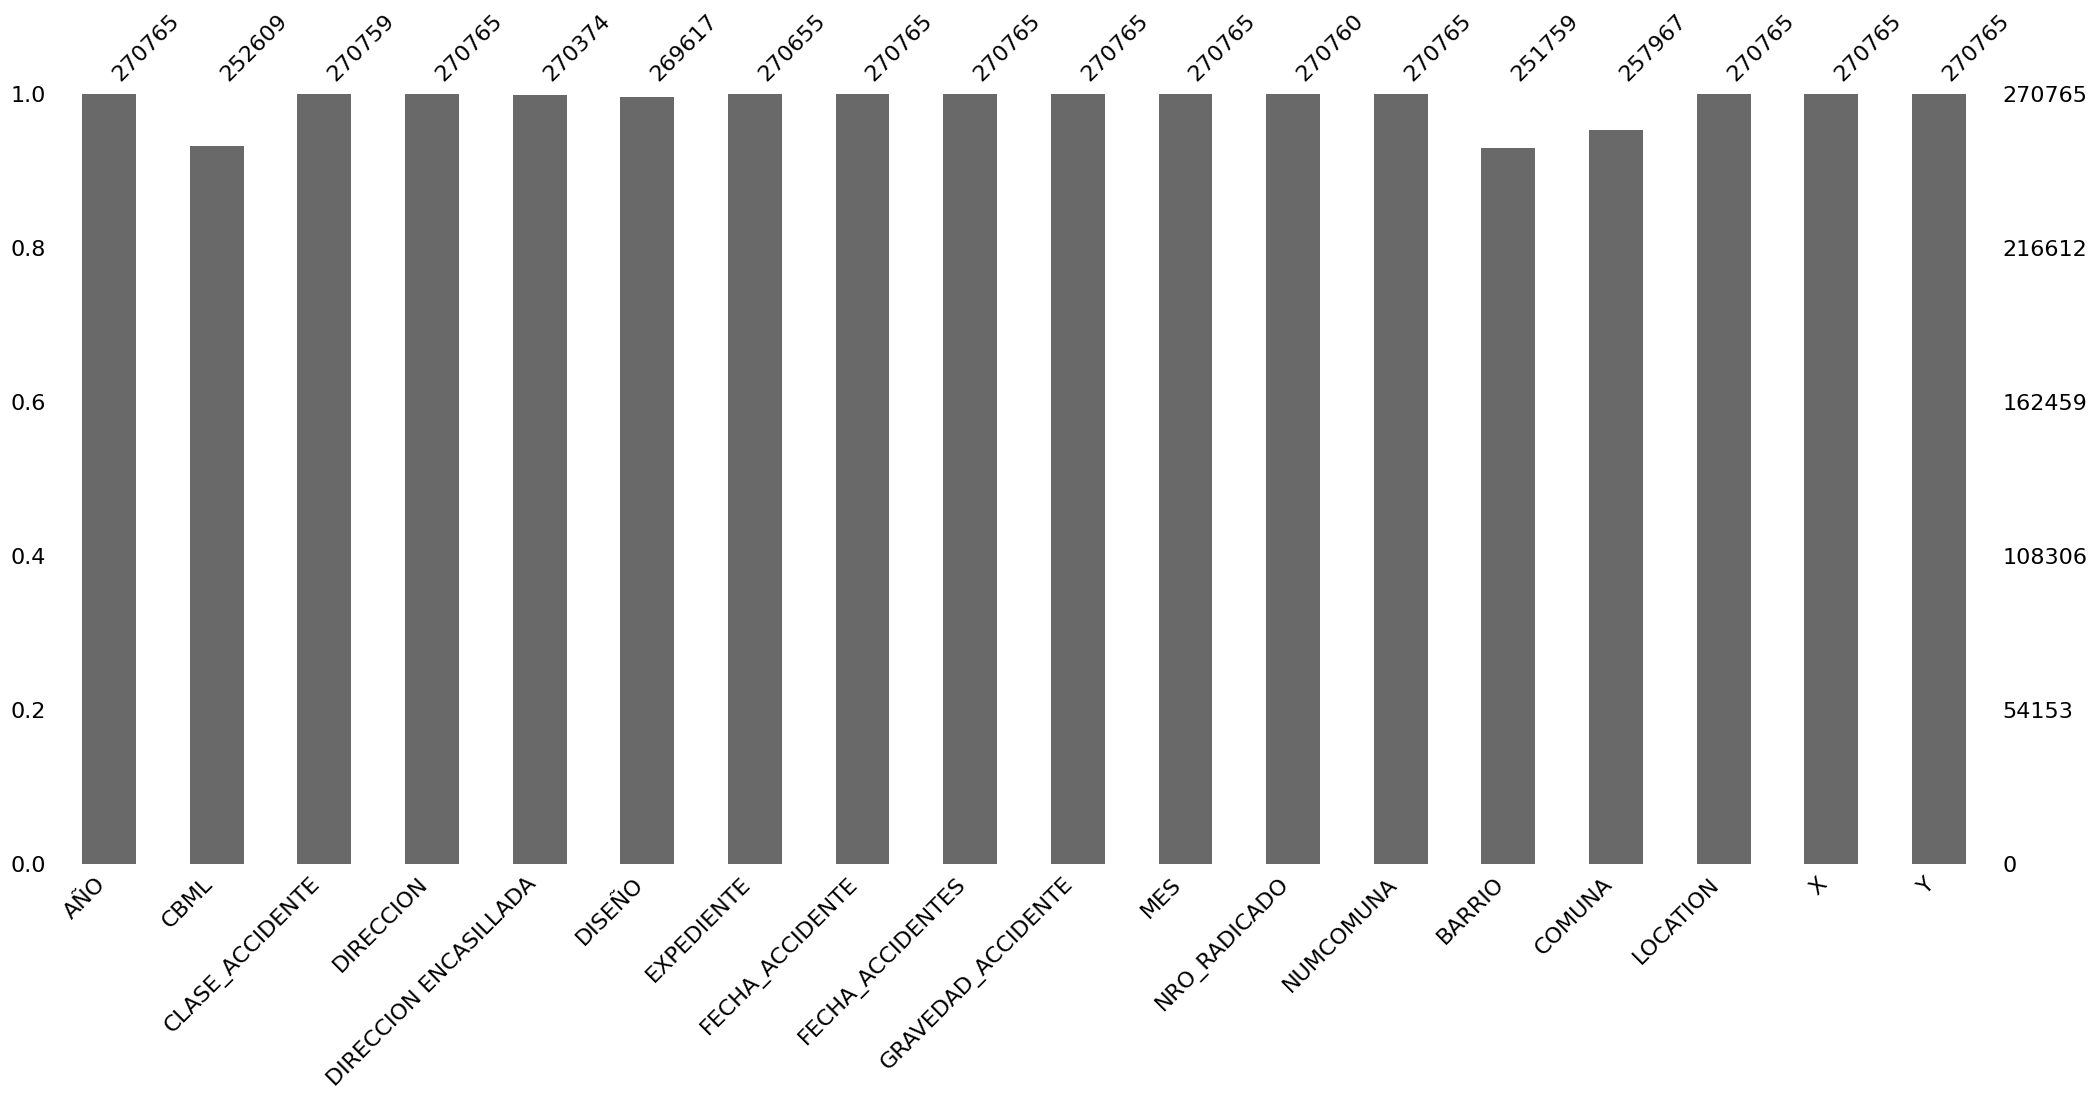

In [39]:
msno.bar(df)

### Análisis exploratorio


#### Año

Como los modelos predictivos se construirán con los datos de los años 2014, 2015, 2016, 2018, 2019, y se validarán con los años 2020 y 2021, se procede a realizar algunos ajustes sobre esta variable, tales como obtener una sola columna por año y así evitar redundancia de datos y eliminación de caracteres especiales.

**Antes**

In [40]:
### Antes
y_pred = df['AÑO'].unique()
df_pred = pd.DataFrame(y_pred, columns=['Año'])
df_pred

,Año
0,2015
1,2014
2,2016
3,2017
4,2018
5,2019\r
6,2019
7,2020
8,2020
9,2015


**Despues de la modificación**

In [41]:
df['AÑO'] = df['AÑO'].replace('2019\\r','2019').astype(str)
#df['AÑO'].unique()
df_pred = pd.DataFrame(df['AÑO'].unique().astype('int'), columns=['Año'])
df_pred

,Año
0,2015
1,2014
2,2016
3,2017
4,2018
5,2019
6,2020


### Accidentes por año

Realizamos un análisis de los accidentes por año y calculamos el porcentaje de accidentes para cada año.

Tabla 2. Número de accidentes por año y su valor porcentual.

In [42]:
### Accidentes por año y porcentaje
accidentes = df.groupby('AÑO').size().reset_index(name='accidentes')
accidentes['porcentaje'] = accidentes['accidentes']/accidentes['accidentes'].sum()*100

# Año como indice
accidentes = accidentes.set_index('AÑO')
accidentes




,accidentes,porcentaje
AÑO,,
2014,22415,8.278396
2015,46172,17.052426
2016,47103,17.396266
2017,46205,17.064613
2018,43358,16.013148
2019,45795,16.913190
2020,19717,7.281960


Tabla 2, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Figura 2. Accidentes por año vs Número de accidentes.

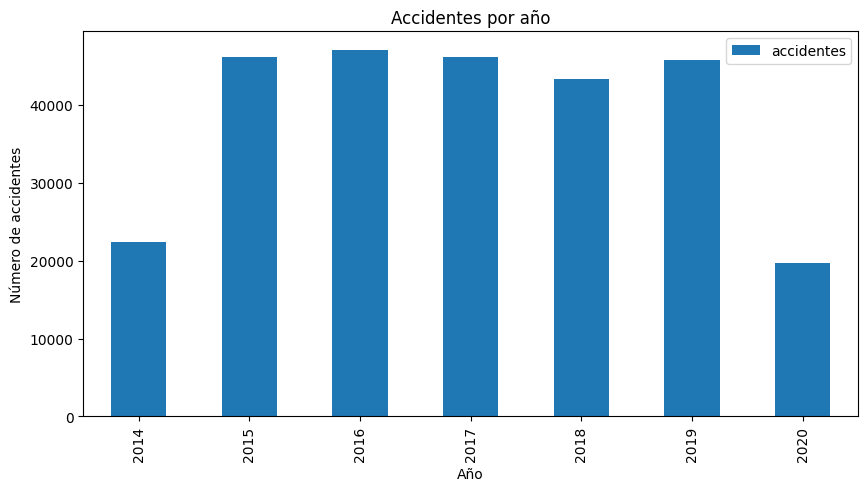

In [43]:
### Gráfica de accidentes por año
accidentes[["accidentes"]].plot(kind='bar', figsize=(10,5), title='Accidentes por año')
plt.ylabel('Número de accidentes')
plt.xlabel('Año')
plt.show()

### Clase de accidente

**Antes**

Obtenemos los valores únicos en la columna 'CLASE_ACCIDENTE'.

In [44]:
df_p = pd.DataFrame(df['CLASE_ACCIDENTE'].unique(), columns=['Clases de accidentes'])
df_p

,Clases de accidentes
0,Caida Ocupante
1,Choque
2,Otro
3,Atropello
4,Volcamiento
5,Caída de Ocupante
6,Caída Ocupante
7,Incendio
8,NaN
9,Caida de Ocupante


**Despues**

Convertimos todos los valores en la columna 'CLASE_ACCIDENTE' a minúsculas para estandarizar el formato de los datos y facilitar la búsqueda y comparación de valores, realizamos una serie de reemplazos en los valores de la columna cambiando algunas variaciones de la frase "caída de ocupante" para que todas se conviertan en "caída ocupante" y mostramos los valores únicos en la columna 'CLASE_ACCIDENTE' con el fin de verificar que las variaciones se han corregido y que los valores en la columna ahora están estandarizados.

In [45]:
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].str.lower()
df['CLASE_ACCIDENTE'] = df['CLASE_ACCIDENTE'].replace('caida ocupante','caída ocupante').replace('caida de ocupante', 'caída ocupante').replace('caída de ocupante','caída ocupante')
df_p = pd.DataFrame(df.CLASE_ACCIDENTE.unique(), columns=['Clases de accidentes'])
df_p

,Clases de accidentes
0,caída ocupante
1,choque
2,otro
3,atropello
4,volcamiento
5,incendio
6,NaN


**Total de accidentes por clase**

Analizamos los accidentes por clase y calculamos el porcentaje de accidentes para cada clase del DataFrame.

Tabla 3. Número de accidentes por clase y su valor porcentual.

In [46]:
### Accidentes por clase
accidentes_clase = df.groupby('CLASE_ACCIDENTE').size().reset_index(name='accidentes')
accidentes_clase['porcentaje'] = accidentes_clase['accidentes']/accidentes_clase['accidentes'].sum()*100

# Clase como indice
accidentes_clase = accidentes_clase.set_index('CLASE_ACCIDENTE')
accidentes_clase

,accidentes,porcentaje
CLASE_ACCIDENTE,,
atropello,25585,9.449363
caída ocupante,24157,8.921956
choque,180575,66.692151
incendio,35,0.012927
otro,30039,11.094368
volcamiento,10368,3.829236


Tabla 3, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Figura 3. Accidentes por clase vs Número de accidentes.

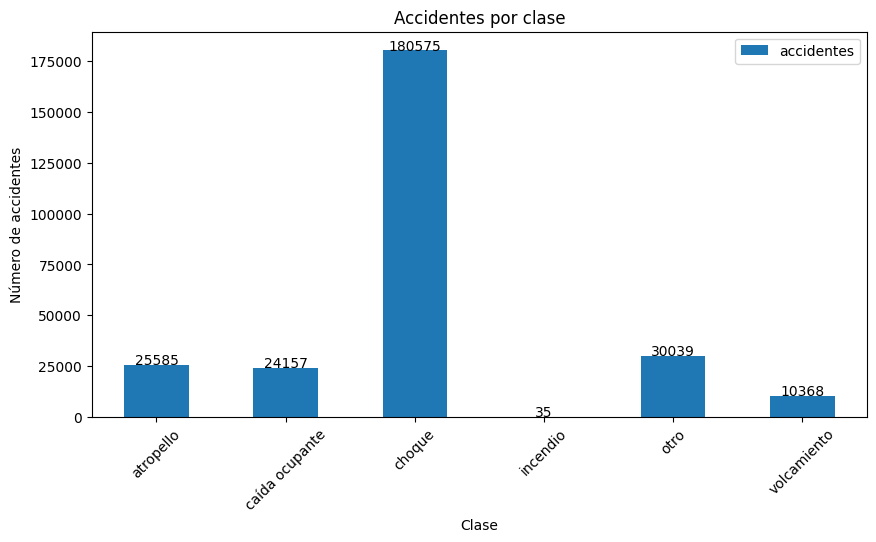

In [47]:
### Gráfica de accidentes por clase 
accidentes_clase[["accidentes"]].plot(kind='bar', figsize=(10,5), title='Accidentes por clase', rot=45)
plt.ylabel('Número de accidentes')
plt.xlabel('Clase')
for i, v in enumerate(accidentes_clase['accidentes']):
    plt.text(i, v, str(v), color='black', ha='center')


### Diseño

**Antes**

Obtenemos los valores únicos de la columna 'DISEÑO'.

In [48]:
#df.DISEÑO.unique()
df_p = pd.DataFrame(df.DISEÑO.unique(), columns=['Diseño'])
df_p

,Diseño
0,Tramo de via
1,Interseccion
2,Glorieta
3,Lote o Predio
4,Paso a Nivel
5,Puente
6,Paso Elevado
7,Ciclo Ruta
8,Paso Inferior
9,NaN


**Despues**

Buscamos y reemplazamos el valor 'Pont\xF3n' por 'Pontón' de la columna 'DISEÑO', esto con el fin de estandarizar los datos y asegurar que las diferentes representaciones de un mismo valor se agrupen correctamente en el análisis. 

In [49]:
df['DISEÑO'] = df['DISEÑO'].replace('Pont\\xF3n','Pontón')
#df.DISEÑO.unique()
df_p = pd.DataFrame(df.DISEÑO.unique(), columns=['Diseño'])
df_p

,Diseño
0,Tramo de via
1,Interseccion
2,Glorieta
3,Lote o Predio
4,Paso a Nivel
5,Puente
6,Paso Elevado
7,Ciclo Ruta
8,Paso Inferior
9,NaN


Analizamos los accidentes por diseño y calculamos el porcentaje de accidentes para cada diseño del DataFrame.

Tabla 4. Número de accidentes por diseño y su valor porcentual.

In [50]:
### Accidentes por diseño
accidentes_diseno = df.groupby('DISEÑO').size().reset_index(name='accidentes')
accidentes_diseno['porcentaje'] = accidentes_diseno['accidentes']/accidentes_diseno['accidentes'].sum()*100

# Diseño como indice
accidentes_diseno = accidentes_diseno.set_index('DISEÑO')
accidentes_diseno

,accidentes,porcentaje
DISEÑO,,
Ciclo Ruta,1040,0.385732
Glorieta,6756,2.505777
Interseccion,43935,16.295337
Lote o Predio,27104,10.052779
Paso Elevado,1399,0.518884
Paso Inferior,678,0.251468
Paso a Nivel,125,0.046362
Pontón,34,0.012610
Puente,1064,0.394634


Tabla 4, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Figura 4. Accidentes por diseño vs Número de accidentes.

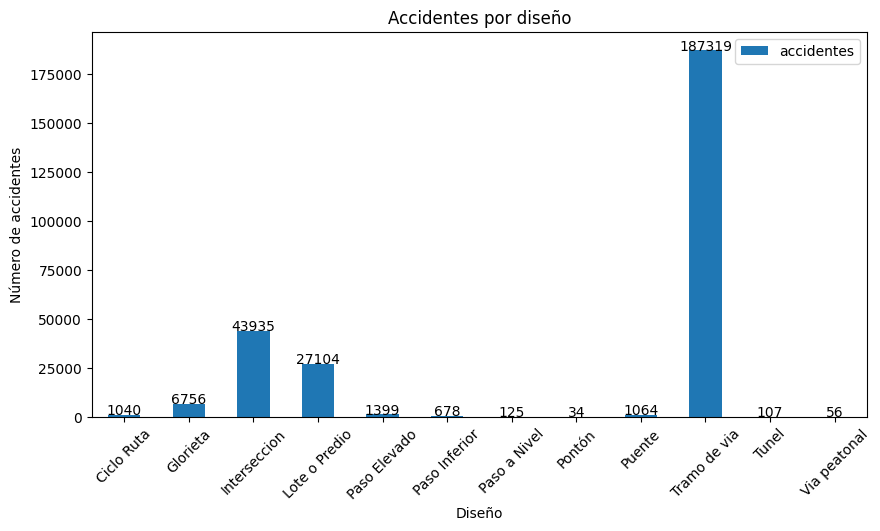

In [51]:
### Gráfica de accidentes por diseño
accidentes_diseno[["accidentes"]].plot(kind='bar', figsize=(10,5), title='Accidentes por diseño', rot=45)
plt.ylabel('Número de accidentes')
plt.xlabel('Diseño')
for i, v in enumerate(accidentes_diseno['accidentes']):
    plt.text(i, v, str(v), color='black', ha='center')

### Gravedad del accidente

**Antes**

Obtenemos los valores únicos de la columna 'GRAVEDAD_ACCIDENTE'.

In [52]:
df_p = pd.DataFrame(df.GRAVEDAD_ACCIDENTE.unique(), columns=['Gravedad accidente'])
df_p

,Gravedad accidente
0,Con heridos
1,Solo daños
2,Con muertos
3,Solo da\xF1os


**Después**

Buscamos y reemplazamos el valor 'Solo da\xF1os' por 'Solo daños'' de la columna 'GRAVEDAD_ACCIDENTE', esto con el fin de estandarizar los datos y asegurar que las diferentes representaciones de un mismo valor se agrupen correctamente en el análisis.

In [53]:
df['GRAVEDAD_ACCIDENTE'] = df['GRAVEDAD_ACCIDENTE'].replace('Solo da\\xF1os','Solo daños')
df_p = pd.DataFrame(df.GRAVEDAD_ACCIDENTE.unique(), columns=['Gravedad accidente'])
df_p

,Gravedad accidente
0,Con heridos
1,Solo daños
2,Con muertos


Analizamos los de accidentes por gravedad y calculamos el porcentaje de accidentes para cada categoría de gravedad del DataFrame.

Tabla 5. Número de accidentes por gravedad y su valor porcentual.

In [54]:
### Accidentes por gravedad
accidentes_gravedad = df.groupby('GRAVEDAD_ACCIDENTE').size().reset_index(name='accidentes')
accidentes_gravedad['porcentaje'] = accidentes_gravedad['accidentes']/accidentes_gravedad['accidentes'].sum()*100

# Gravedad como indice
accidentes_gravedad = accidentes_gravedad.set_index('GRAVEDAD_ACCIDENTE')
accidentes_gravedad

,accidentes,porcentaje
GRAVEDAD_ACCIDENTE,,
Con heridos,150071,55.424815
Con muertos,1489,0.549923
Solo daños,119205,44.025262


Tabla 5, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Figura 5. Accidentes por gravedad vs Número de accidentes.

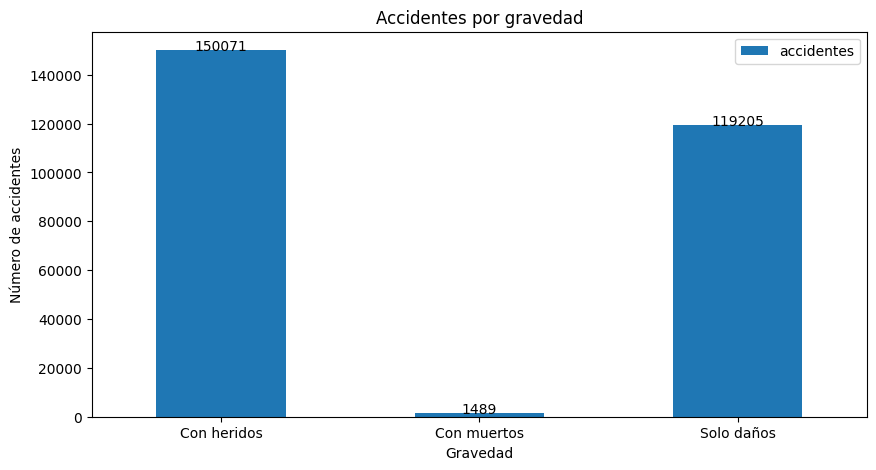

In [55]:
### Gráfica de accidentes por gravedad
accidentes_gravedad[["accidentes"]].plot(kind='bar', figsize=(10,5), title='Accidentes por gravedad', rot=0)
plt.ylabel('Número de accidentes')
plt.xlabel('Gravedad')
for i, v in enumerate(accidentes_gravedad['accidentes']):
    plt.text(i, v, str(v), color='black', ha='center')

### Barrio

Obtenemos los valores únicos de la columna 'BARRIO.

In [56]:
pd.DataFrame(df.BARRIO.unique(), columns=["Barrios"])

,Barrios
0,Barrio Colón
1,San Diego
2,La Francia
3,Santo Domingo Savio No. 1
4,Santa Fé
...,...
486,0202
487,Boqueron
488,Travesías
489,Moscú No.1


Analizamos los accidentes por barrioy calculamos el porcentaje de accidentes, para obtener un DataFrame llamado 'accidentes_barrio' que muestra el número de accidentes y el porcentaje de accidentes para cada barrio, con el barrio como índice. Esto permite analizar y visualizar la distribución de accidentes por barrio en los datos.

Tabla 6. Número de accidentes por barrio y su valor porcentual.

In [57]:
### Accidentes por barrio
accidentes_barrio = df.groupby('BARRIO').size().reset_index(name='accidentes')
accidentes_barrio['porcentaje'] = accidentes_barrio['accidentes']/accidentes_barrio['accidentes'].sum()*100

# barrio como indice
accidentes_barrio = accidentes_barrio.set_index('BARRIO')
accidentes_barrio.sort_values('porcentaje', ascending=False) # Mostrar tabla de mayor a menor


,accidentes,porcentaje
BARRIO,,
La Candelaria,5901,2.343908
Campo Amor,5142,2.042429
Perpetuo Socorro,5093,2.022966
Caribe,4866,1.932801
Los Conquistadores,4108,1.631719
...,...,...
Sin Inf,1,0.000397
Piedras Blancas - Matasano,1,0.000397
1108,1,0.000397


Tabla 6, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Figura 6. Accidentes por barrio vs Número de accidentes.

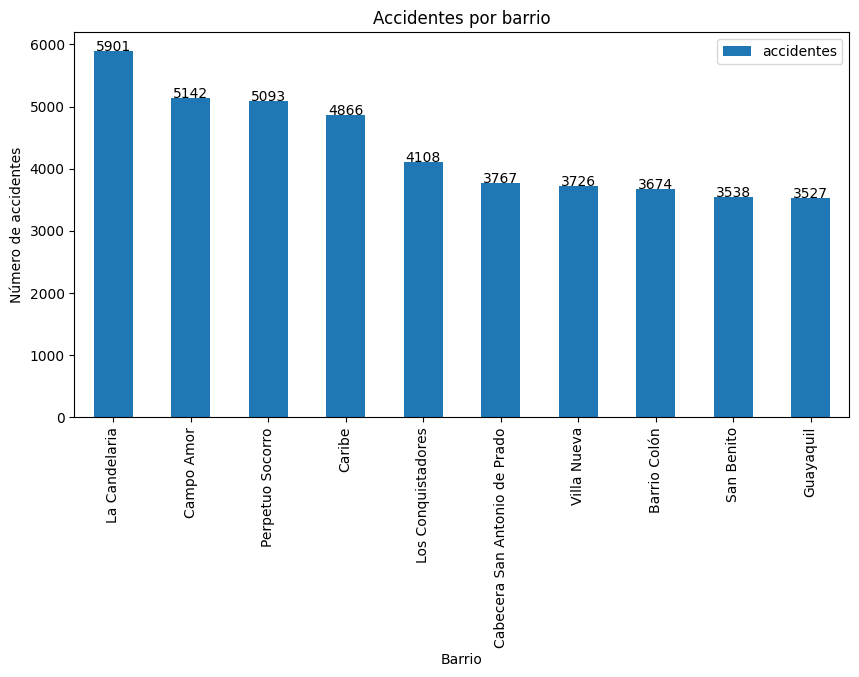

In [58]:
### Gráfica de accidentes por barrio (Top 10)
top_10_barrios = accidentes_barrio.sort_values('porcentaje', ascending=False)[0:10]
top_10_barrios[["accidentes"]].plot(kind='bar', figsize=(10,5), title='Accidentes por barrio', rot=90)
plt.ylabel('Número de accidentes')
plt.xlabel('Barrio')
for i, v in enumerate(top_10_barrios['accidentes']):
    plt.text(i, v, str(v), color='black', ha='center')

### Clase de accidente por barrio

Figura 7. Gráfica de clases de accidentes por barrio.

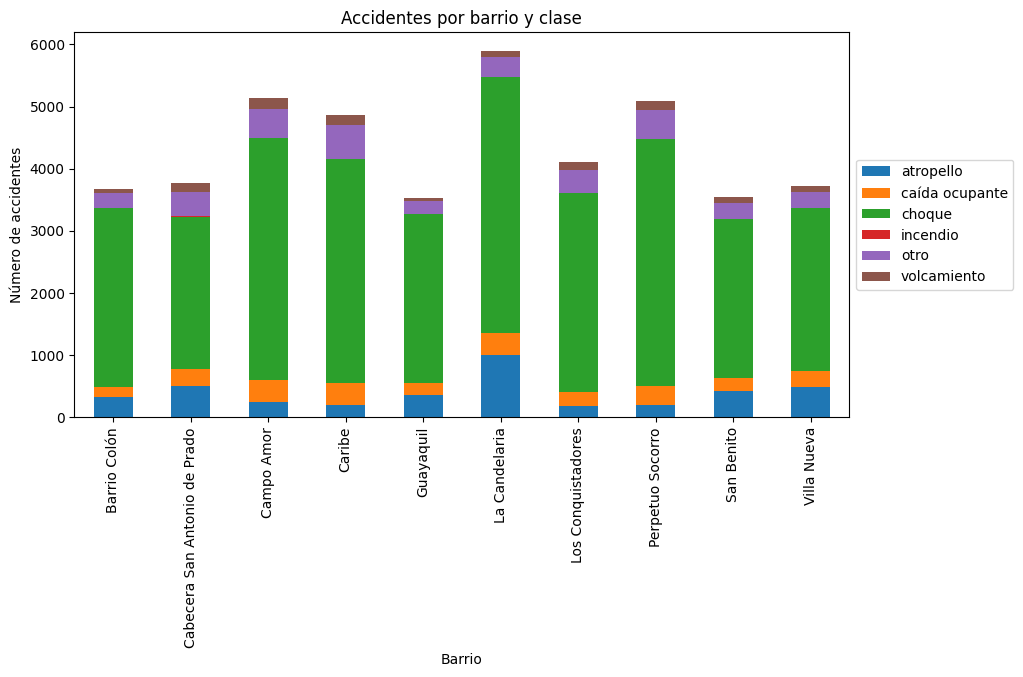

In [59]:
### Grafica de clases de accidentes por barrio (top 10)
accidentes_clase_barrio = df.groupby(['BARRIO','CLASE_ACCIDENTE']).size().reset_index(name='accidentes').sort_values('accidentes', ascending=False)
accidentes_clase_barrio = accidentes_clase_barrio[accidentes_clase_barrio['BARRIO'].isin(top_10_barrios.index)]
accidentes_clase_barrio = accidentes_clase_barrio.pivot(index='BARRIO', columns='CLASE_ACCIDENTE', values='accidentes')
accidentes_clase_barrio.plot(kind='bar', stacked=True, figsize=(10,5), title='Accidentes por barrio y clase', rot=90)
plt.ylabel('Número de accidentes')
plt.xlabel('Barrio')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



### Diseño y clase de accidente

Figura 8. Gráfica de clases de accidentes por diseño.

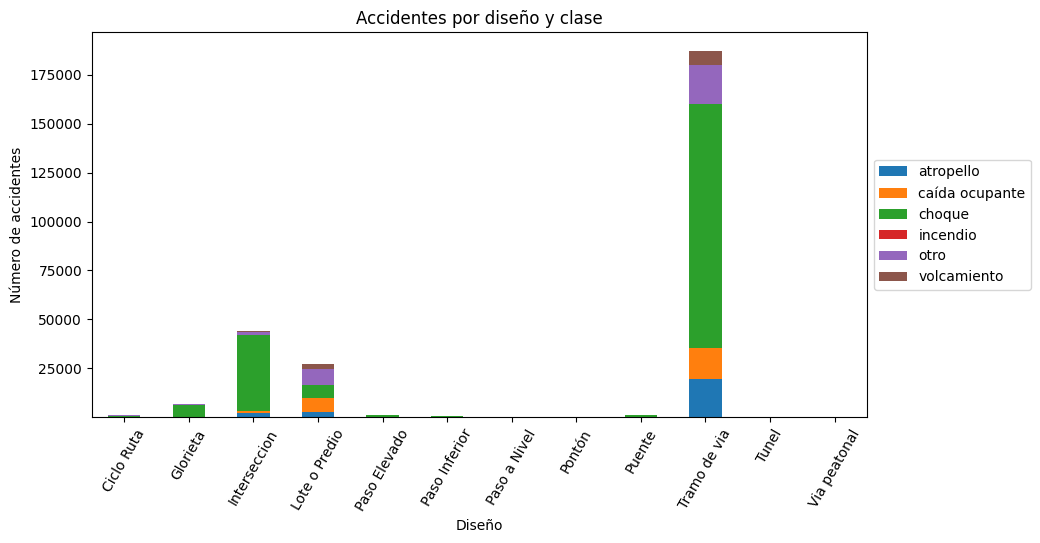

In [60]:
### Gráfica de diseño por clase de accidente
accidentes_diseno_clase = df.groupby(['DISEÑO', 'CLASE_ACCIDENTE']).size().reset_index(name='accidentes')
accidentes_diseno_clase = accidentes_diseno_clase.pivot(index='DISEÑO', columns='CLASE_ACCIDENTE', values='accidentes')
accidentes_diseno_clase.plot(kind='bar', stacked=True, figsize=(10,5), title='Accidentes por diseño y clase', rot=60)
plt.ylabel('Número de accidentes')
plt.xlabel('Diseño')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



### Fechas accidentes



Se hace conversión de las fechas del dataset a formato America/Bogota, para luego comparar con las demás variable

In [61]:
# Transformar las fechas a America/Bogotá
df.FECHA_ACCIDENTES  = pd.to_datetime(df.FECHA_ACCIDENTES, infer_datetime_format=True).dt.tz_convert("America/Bogota")
df.FECHA_ACCIDENTE = pd.to_datetime(df.FECHA_ACCIDENTE.str.replace("Sin Inf", ""), infer_datetime_format=True)

### Accidentalidad por mes

Figura 9. Gráfica de clases de accidentes por mes.

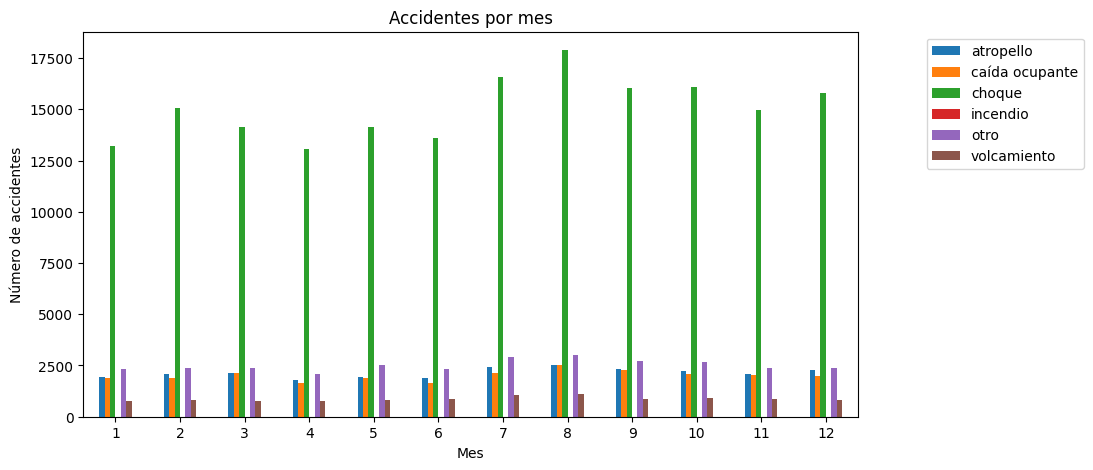

In [62]:
### Gráfica de clases de accidentes por mes
df['MES'] = df['FECHA_ACCIDENTES'].dt.month
accidentes_mes = df.groupby(['MES','CLASE_ACCIDENTE']).size().reset_index(name='accidentes')
accidentes_mes = accidentes_mes.pivot(index='MES', columns='CLASE_ACCIDENTE', values='accidentes')
accidentes_mes.plot(kind='bar', figsize=(10,5), title='Accidentes por mes', rot=0)
plt.ylabel('Número de accidentes')
plt.xlabel('Mes')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()




### Accidentalidad por año

Figura 10. Gráfica de clases de accidentes por año.

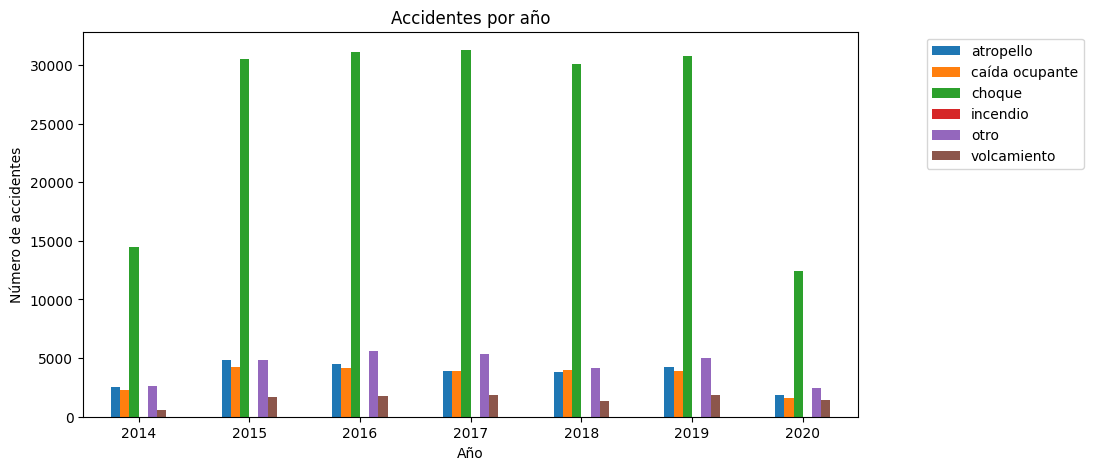

In [63]:
### Gráfica de clases de accidentes por año
df['AÑO'] = df['FECHA_ACCIDENTES'].dt.year
accidentes_año = df.groupby(['AÑO','CLASE_ACCIDENTE']).size().reset_index(name='accidentes')
accidentes_año = accidentes_año.pivot(index='AÑO', columns='CLASE_ACCIDENTE', values='accidentes')
accidentes_año.plot(kind='bar', figsize=(10,5), title='Accidentes por año', rot=0)
plt.ylabel('Número de accidentes')
plt.xlabel('Año')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

### Accidentalidad por días de la semana

Figura 11. Gráfica de clases de accidentes por dia.

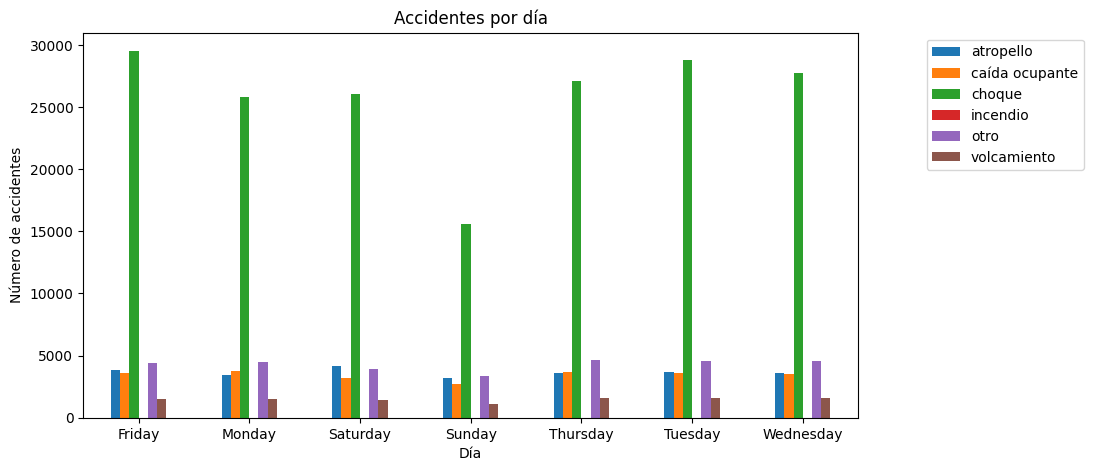

In [64]:
### Gráfica de clases de accidentes por día
df['DIA'] = df['FECHA_ACCIDENTES'].dt.day_name()
accidentes_dia = df.groupby(['DIA','CLASE_ACCIDENTE']).size().reset_index(name='accidentes')
accidentes_dia = accidentes_dia.pivot(index='DIA', columns='CLASE_ACCIDENTE', values='accidentes')
accidentes_dia.plot(kind='bar', figsize=(10,5), title='Accidentes por día', rot=0)
plt.ylabel('Número de accidentes')
plt.xlabel('Día')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


### Accidentalidad por horas del día

Figura 12. Gráfica de clases de accidentes por hora.

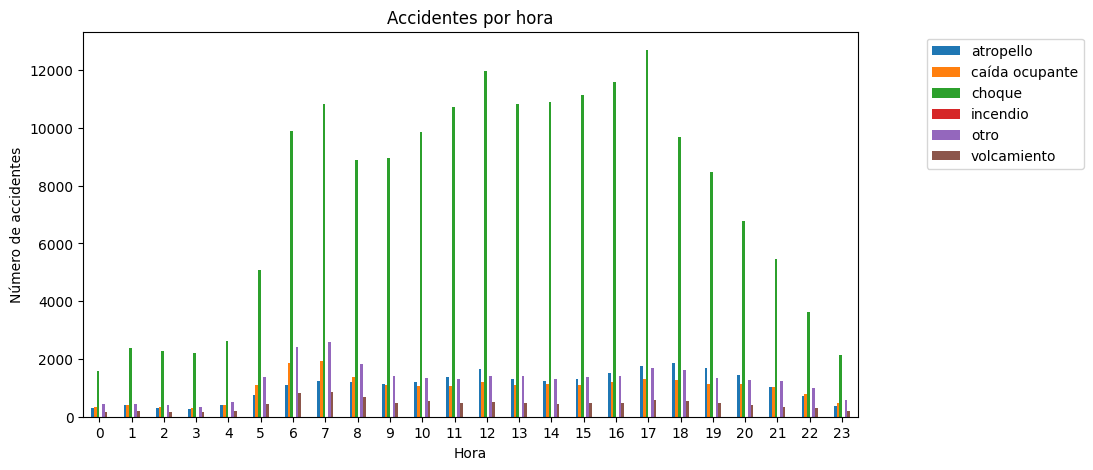

In [65]:
### Gráfica de clases de accidentes por hora
df['HORA'] = df['FECHA_ACCIDENTES'].dt.hour
accidentes_hora = df.groupby(['HORA','CLASE_ACCIDENTE']).size().reset_index(name='accidentes')
accidentes_hora = accidentes_hora.pivot(index='HORA', columns='CLASE_ACCIDENTE', values='accidentes')
accidentes_hora.plot(kind='bar', figsize=(10,5), title='Accidentes por hora', rot=0)
plt.ylabel('Número de accidentes')
plt.xlabel('Hora')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  
plt.show()


### Localización

Modificamos la columna 'LOCATION' eliminando los corchetes "[ ]" en cada entrada de 'LOCATION' y luego dividimos los elementos por comas para obtener una lista de elementos en lugar de una cadena de caracteres. Esto es útil para acceder y trabajar con los elementos individuales de cada lista en análisis futuros.

In [66]:
df.LOCATION = df.LOCATION.str.replace("[","").str.replace("]","").str.split(",")

Se crea una nueva columna llamada 'longitud' que contiene las coordenadas de longitud extraídas de la primera posición (índice 0) de la lista en 'LOCATION' y se convierten en valores de punto flotante, luego crea otra nueva columna llamada 'latitud' que contiene las coordenadas de latitud extraídas de la segunda posición (índice 1) de la lista en 'LOCATION', y se convierten en valores de punto flotante.

In [67]:
df["longitud"] = df.LOCATION.apply(lambda x: x[0]).astype(float) 
df["latitud"] = df.LOCATION.apply(lambda x: x[1]).astype(float)

Gráfica de dispersión con coordenadas de longitud en el eje x (horizontal) y las coordenadas de latitud en el eje y (vertical).

Figura 13.  Dispersión longitud vs latitud.

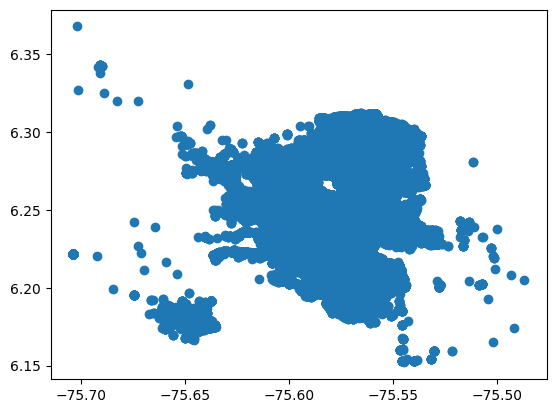

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitud'], y=df['latitud'])
plt.show()

In [69]:
import geopandas as gpd
from folium import Choropleth
from folium.plugins import HeatMap

Utilizando la biblioteca Geopandas cargamos datos geoespaciales desde una fuente en línea, en este caso obtenemos datos geoespaciales desde una URL que se conecta a un servicio de mapas del gobierno de Medellín y lo guardamos en la variable 'data_geo'.

In [70]:
data_geo = gpd.read_file("Barrio_Vereda.shp")
gdf_simplified = data_geo.geometry.simplify(tolerance=0.05) ### Para bajar el peso y poder mostrar el mapa
data_geo['geometry'] = gdf_simplified

Obtenemos los valores únicos de la columna 'Nombre' en 'data_geo' para proporcionar una lista de los barrios presentes. Los códigos son utilizados para identificar áreas geográficas específicas.

In [71]:
df_p = pd.DataFrame(data_geo['NOMBRE'], columns=['NOMBRE'])
df_p

,NOMBRE
0,Miranda
1,U.D. Atanasio Girardot
2,Patio Bonito
3,Manrique Oriental
4,La Esperanza No.2
...,...
327,Pajarito
328,El Uvito
329,Travesías
330,Pedregal Alto


### Nivel de accidentalidad diferenciado por comunas y corregimientos

Tabla 7. Visualización de valores de 'data_geo'.

In [72]:
data_geo.head()

,OBJECTID,CODIGO,NOMBRE,SUBTIPO_BA,SHAPEAREA,SHAPELEN,geometry
0,682,0415,Miranda,1,230378.299048,2359.939726,"POLYGON ((-75.56047 6.27828, -75.56089 6.27613..."
1,683,Inst_14,U.D. Atanasio Girardot,1,417796.539390,3340.183294,"POLYGON ((-75.58609 6.25850, -75.58780 6.25313..."
2,684,1421,Patio Bonito,1,729056.068030,4102.132884,"POLYGON ((-75.57560 6.21307, -75.57135 6.20767..."
3,685,0308,Manrique Oriental,1,373291.559375,3004.096249,"POLYGON ((-75.54768 6.26714, -75.54711 6.26107..."
4,686,0110,La Esperanza No.2,1,67338.260559,1299.674139,"POLYGON ((-75.54137 6.29269, -75.53964 6.29249..."


Tabla 7, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Se realiza un conteo de los barrios en el DataFrame y se ordenan alfabéticamente, luego se renombra la columna de conteo a 'Cantidad', añadiendo también los nombres de los barrios como una nueva columna.

In [73]:
barrio_count_values = df['BARRIO'].value_counts().sort_index().to_frame()
barrio_count_values.rename(columns= {'BARRIO': 'Cantidad'}, inplace = True)
barrio_count_values['index'] = barrio_count_values.index
barrio_count_values.rename(columns = {'BARRIO':'Cantidad'}, inplace = True)

barrio_count_values

,Cantidad,index
0,1046,0
0103,5,0103
0105,2,0105
0109,3,0109
0202,1,0202
...,...,...
\xC1rea de Expansi\xF3n San Antonio de Prado,16,\xC1rea de Expansi\xF3n San Antonio de Prado
Área de Expansión Altavista,11,Área de Expansión Altavista
Área de Expansión Altos de Calasanz,94,Área de Expansión Altos de Calasanz
Área de Expansión Pajarito,855,Área de Expansión Pajarito


Se realiza una operación de combinación entre 'data_geo' y 'barrio_count_values' para luego seleccionar un subconjunto de columnas que quedan guardadas dentro del dataframe 'df_final'.

In [74]:
df_final = data_geo.merge(barrio_count_values, left_on="NOMBRE", right_on="index", how="outer") 
df_final = df_final[['OBJECTID', 'CODIGO', 'NOMBRE', 'geometry', 'Cantidad']]

A continuación, convertimos el índice de 'df_final' en una representación de cadena (string).

In [75]:
df_final.index=map(lambda p : str(p),df_final.index)
df_final.dropna(subset=['geometry'], inplace=True)

Tabla 8. Visualizaciones de valores de 'df_final'.

In [76]:
df_final.head()

,OBJECTID,CODIGO,NOMBRE,geometry,Cantidad
0,682.0,0415,Miranda,"POLYGON ((-75.56047 6.27828, -75.56089 6.27613...",1188.0
1,683.0,Inst_14,U.D. Atanasio Girardot,"POLYGON ((-75.58609 6.25850, -75.58780 6.25313...",333.0
2,684.0,1421,Patio Bonito,"POLYGON ((-75.57560 6.21307, -75.57135 6.20767...",1202.0
3,685.0,0308,Manrique Oriental,"POLYGON ((-75.54768 6.26714, -75.54711 6.26107...",1055.0
4,686.0,0110,La Esperanza No.2,"POLYGON ((-75.54137 6.29269, -75.53964 6.29249...",NaN


Tabla 8, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Creamos un nuevo DataFrame llamado 'position' y seleccionamos solo las columnas 'latitud', 'longitud' y 'BARRIO'. 

In [77]:
position = df[['latitud', 'longitud', 'BARRIO']]

Procedemos a crear un mapa interactivo utilizando la biblioteca Folium, el cual mostrara una base y agrega un mapa coroplético que representa la cantidad de accidentes en diferentes barrios.

In [78]:
# Create a base map
m = folium.Map(location=[position.latitud.mean(), position.longitud.mean()],zoom_start=11)


bins = list(df_final["Cantidad"].quantile([0, 0.25, 0.5, 0.75, 1]))
# Add a choropleth map to the base map
Choropleth(geo_data=df_final.geometry.__geo_interface__, 
           data=df_final.Cantidad, 
           key_on="feature.id", 
           columns=['NOMBRE', 'Cantidad'],
           fill_color='YlOrRd', 
           legend_name='Cantidad de accidentes',
           nan_fill_color="White", #Use white color if there is no data available for the county
           fill_opacity=0.7,
           line_opacity=0.1,
           #bins= bins
          ).add_to(m)

#Add Customized Tooltips to the map
folium.features.GeoJson(
                    data=df_final,
                    name='Cantidad de accidentes por barrio',
                    smooth_factor=2,
                    style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.01},
                    tooltip=folium.features.GeoJsonTooltip(
                        fields=['NOMBRE',
                                'Cantidad'
                               ],
                        aliases=["Nombre:",
                                 "Cantidad de accidentes:",
                               
                                ], 
                        localize=True,
                        sticky=False,
                        labels=True,
                        style="""
                            background-color: #F0EFEF;
                            border: 2px solid black;
                            border-radius: 3px;
                            box-shadow: 3px;
                        """,
                        max_width=800,),
                            highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
                        ).add_to(m) 

Figura 14. Mapeo de incedentalidades viales en las diferentes comunas.

In [79]:
m

### Entrenamiento del Modelo Predictivo - Diario

Para empezar, sacamos la fecha de los accidentes en año, mes y día, lo que facilitara el análisis temporal. Luego agrupamos los datos por año, mes, día y tipo de accidente contando cuántos accidentes ocurren en cada categoría. Esto proporcionara información detallada sobre la frecuencia de accidentes diarias por tipo de accidente. Esta agrupación es importante para comprender patrones y tendencias en la accidentalidad de Medellín.

Tabla 9. Visualización de datos antes de agrupación por año, mes y día.

In [80]:
df

,AÑO,CBML,CLASE_ACCIDENTE,DIRECCION,DIRECCION ENCASILLADA,DISEÑO,EXPEDIENTE,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,...,NUMCOMUNA,BARRIO,COMUNA,LOCATION,X,Y,DIA,HORA,longitud,latitud
0,2015,1013,caída ocupante,CR 46 CL 43,CR 046 043 000 00000,Tramo de via,A000259731,2015-10-21 05:58:00,2015-10-21 05:58:00-05:00,Con heridos,...,10,Barrio Colón,La Candelaria,"[-75.5688011014, 6.24312304123]",834949.69,1182357.34,Wednesday,5,-75.568801,6.243123
1,2015,1020,choque,CR 43 A CL 29,CR 043 A 029 000 00000,Tramo de via,A000261725,2015-05-11 03:00:00,2015-11-05 03:00:00-05:00,Solo daños,...,10,San Diego,La Candelaria,"[-75.5693883283, 6.22870030622]",834880.17,1180762.02,Thursday,3,-75.569388,6.228700
2,2015,0205,otro,CR 46 CL 37,CR 046 037 000 00000,Tramo de via,A000259739,2015-10-21 07:40:00,2015-10-21 07:40:00-05:00,Con heridos,...,02,La Francia,Santa Cruz,"[-75.5503911403, 6.29869502502]",837004.94,1188499.17,Wednesday,7,-75.550391,6.298695
3,2015,0101,atropello,CR 34 CL 112,CR 034 112 000 00000,Tramo de via,A000259752,2015-10-21 12:00:00,2015-10-21 12:00:00-05:00,Con heridos,...,01,Santo Domingo Savio No. 1,Popular,"[-75.5442195069, 6.30019383306]",837688.53,1188663.05,Wednesday,12,-75.544220,6.300194
4,2015,1504,choque,CR 50 CL 14,CR 050 014 000 00000,Tramo de via,A000259949,2015-03-11 06:16:00,2015-11-03 06:16:00-05:00,Solo daños,...,15,Santa Fé,Guayabal,"[-75.578180998, 6.21699243701]",833903.11,1179469.60,Tuesday,6,-75.578181,6.216992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,2017,0913,atropello,CR 28 CL 38 F,CR 028 038 F 000 00000,Lote o Predio,A000585344,2017-04-21 17:30:00,2017-04-21 17:30:00-05:00,Con heridos,...,09,Loreto,Buenos Aires,"[-75.5559460731, 6.23260034372]",836369.48,1181189.27,Friday,17,-75.555946,6.232600
270761,2017,1115,caída ocupante,CL 53 CR 69,CL 053 069 000 00000,Lote o Predio,A000580176,2017-10-03 16:30:00,2017-03-10 16:30:00-05:00,Con heridos,...,11,Cuarta Brigada,Laureles Estadio,"[-75.5851522144, 6.26044928627]",833145.10,1184279.21,Friday,16,-75.585152,6.260449
270762,2017,0513,choque,CR 64 C CL 92,CR 064 C 092 000 00000,Tramo de via,A000580528,2017-10-03 17:10:00,2017-03-10 17:10:00-05:00,Solo daños,...,05,Francisco Antonio Zea,Castilla,"[-75.5713587099, 6.28457841509]",834679.61,1186944.12,Friday,17,-75.571359,6.284578
270763,2017,0607,caída ocupante,CR 78 A CL 92,CR 078 A 092 000 00000,Tramo de via,A000580245,2017-10-03 20:00:00,2017-03-10 20:00:00-05:00,Con heridos,...,06,Kennedy,Doce de Octubre,"[-75.5831132045, 6.28957484792]",833380.07,1187500.58,Friday,20,-75.583113,6.289575


Tabla 9, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Tabla 10. Visualización de datos después de agrupación por año, mes y día.

In [81]:
### Agrupar a nivel diario y por tipo de accidente
df["year"] = df["FECHA_ACCIDENTES"].dt.year
df["month"] = df["FECHA_ACCIDENTES"].dt.month
df["day"] = df["FECHA_ACCIDENTES"].dt.day

df_agregado = df.groupby(["year", "month", "day", "CLASE_ACCIDENTE"]).size().reset_index(name="accidentes")

df_agregado

,year,month,day,CLASE_ACCIDENTE,accidentes
0,2014,7,4,choque,24
1,2014,7,5,atropello,27
2,2014,7,5,caída ocupante,21
3,2014,7,5,choque,66
4,2014,7,5,otro,7
...,...,...,...,...,...
11191,2020,8,31,atropello,10
11192,2020,8,31,caída ocupante,5
11193,2020,8,31,choque,62
11194,2020,8,31,otro,8


Tabla 10, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Agregamos variables al dataframe que nos brindarán mas información acerca de las fechas donde ocurren los accidentes(si ocurrió en un fin de semana, si era un día feriado, si era quincena, etc...).

Tabla 11. Visualización de datos después de adición de variables del modelo predictivo diario.

In [82]:
### Creacion de variables de tiempo
df_agregado["date"] = pd.to_datetime(df_agregado[["year", "month", "day"]])
df_agregado["day_of_week"] = df_agregado["date"].dt.weekday
df_agregado['is_weekend'] = df_agregado['date'].dt.dayofweek.isin([5,6])*1
df_agregado['is_holiday'] = df_agregado.date.apply(lambda x: str(x) in co_holidays)
df_agregado['quarter'] = df_agregado['date'].dt.quarter
df_agregado['weekofyear'] = df_agregado['date'].dt.weekofyear

def is_fortnight(df):
    MASK = (df.day == 15) | (df.day == 30)
    df["is_fortnight"] = False
    df.loc[MASK, "is_fortnight"] = True
    FEBRERO =  (df.month == 2) & (df.day == 28 )
    df.loc[FEBRERO, "is_fortnight"] = True
    return df

df_agregado = is_fortnight(df_agregado)


df_agregado = df_agregado.sort_values(["CLASE_ACCIDENTE", "date"]).reset_index(drop=True)

### Numero de accidentes en los ultimos 7 dias
df_agregado['lag_1'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(1).fillna(0)
df_agregado['lag_2'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(2).fillna(0)
df_agregado['lag_3'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(3).fillna(0)
df_agregado['lag_4'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(4).fillna(0)
df_agregado['lag_5'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(5).fillna(0)
df_agregado['lag_6'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(6).fillna(0)
df_agregado['lag_7'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(7).fillna(0)

### Rolling mean de los ultimos 7 dias
df_agregado['rolling_mean_7'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].rolling(7).mean().reset_index(0,drop=True).fillna(0)

### Rolling mean de los ultimos 3 dias
df_agregado['rolling_mean_3'] = df_agregado.groupby(["CLASE_ACCIDENTE"])["accidentes"].rolling(3).mean().reset_index(0,drop=True).fillna(0)

### Ciclo de 7 dias
df_agregado['sin_week'] = np.sin(2*np.pi*df_agregado["day_of_week"]/7)
df_agregado['cos_week'] = np.cos(2*np.pi*df_agregado["day_of_week"]/7)





df_agregado.drop(["date"], axis=1, inplace=True)

df_agregado

,year,month,day,CLASE_ACCIDENTE,accidentes,day_of_week,is_weekend,is_holiday,quarter,weekofyear,...,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_3,sin_week,cos_week
0,2014,7,5,atropello,27,5,1,False,3,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.974928,-0.222521
1,2014,7,6,atropello,17,6,1,False,3,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.781831,0.623490
2,2014,7,7,atropello,11,0,0,False,3,28,...,27.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.333333,0.000000,1.000000
3,2014,7,8,atropello,7,1,0,False,3,28,...,17.0,27.0,0.0,0.0,0.0,0.0,0.000000,11.666667,0.781831,0.623490
4,2014,7,9,atropello,15,2,0,False,3,28,...,11.0,17.0,27.0,0.0,0.0,0.0,0.000000,11.000000,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11191,2020,8,27,volcamiento,10,3,0,False,3,35,...,1.0,13.0,6.0,9.0,12.0,17.0,8.142857,5.666667,0.433884,-0.900969
11192,2020,8,28,volcamiento,6,4,0,False,3,35,...,6.0,1.0,13.0,6.0,9.0,12.0,7.285714,7.333333,-0.433884,-0.900969
11193,2020,8,29,volcamiento,7,5,1,False,3,35,...,10.0,6.0,1.0,13.0,6.0,9.0,7.000000,7.666667,-0.974928,-0.222521
11194,2020,8,30,volcamiento,6,6,1,False,3,35,...,6.0,10.0,6.0,1.0,13.0,6.0,7.000000,6.333333,-0.781831,0.623490


Tabla 11, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Seleccionamos los valores de la columna accidentes para diferentes tipos de accidentes, como choque, atropello, caída ocupante, otro, volcamiento, incendio y almacenamos estos valores en variables separadas. Después concatenamos estas variables en values y se especifican las columnas al unir asignándoles nombres descriptivos, después se rellenan los valores NaN con ceros (0).

Tabla 12. Visualización de 'values' del modelo predictivo diario.

In [83]:
### separar valores de clase de accidente en columnas
choque = df_agregado[df_agregado.CLASE_ACCIDENTE == "choque"].accidentes
atropello = df_agregado[df_agregado.CLASE_ACCIDENTE == "atropello"].accidentes
caida = df_agregado[df_agregado.CLASE_ACCIDENTE == "caída ocupante"].accidentes
otro = df_agregado[df_agregado.CLASE_ACCIDENTE == "otro"].accidentes
volcamiento = df_agregado[df_agregado.CLASE_ACCIDENTE == "volcamiento"].accidentes
incendio = df_agregado[df_agregado.CLASE_ACCIDENTE == "incendio"].accidentes
values = pd.concat([choque, atropello, caida, otro, volcamiento, incendio], axis=1, keys=['choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'])
values = values.fillna(0)

values



,choque,atropello,caida,otro,volcamiento,incendio
4486,24.0,0.0,0.0,0.0,0.0,0.0
4487,66.0,0.0,0.0,0.0,0.0,0.0
4488,43.0,0.0,0.0,0.0,0.0,0.0
4489,112.0,0.0,0.0,0.0,0.0,0.0
4490,87.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6767,0.0,0.0,0.0,0.0,0.0,1.0
6768,0.0,0.0,0.0,0.0,0.0,1.0
6769,0.0,0.0,0.0,0.0,0.0,1.0
6770,0.0,0.0,0.0,0.0,0.0,1.0


Tabla 12, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Tabla 13. Visualización de los datos al concatenarse con 'values' del modelo predictivo diario.

In [84]:
df_full = pd.concat([df_agregado, values], axis=1)

df_full

,year,month,day,CLASE_ACCIDENTE,accidentes,day_of_week,is_weekend,is_holiday,quarter,weekofyear,...,rolling_mean_7,rolling_mean_3,sin_week,cos_week,choque,atropello,caida,otro,volcamiento,incendio
0,2014,7,5,atropello,27,5,1,False,3,27,...,0.000000,0.000000,-0.974928,-0.222521,0.0,27.0,0.0,0.0,0.0,0.0
1,2014,7,6,atropello,17,6,1,False,3,27,...,0.000000,0.000000,-0.781831,0.623490,0.0,17.0,0.0,0.0,0.0,0.0
2,2014,7,7,atropello,11,0,0,False,3,28,...,0.000000,18.333333,0.000000,1.000000,0.0,11.0,0.0,0.0,0.0,0.0
3,2014,7,8,atropello,7,1,0,False,3,28,...,0.000000,11.666667,0.781831,0.623490,0.0,7.0,0.0,0.0,0.0,0.0
4,2014,7,9,atropello,15,2,0,False,3,28,...,0.000000,11.000000,0.974928,-0.222521,0.0,15.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11191,2020,8,27,volcamiento,10,3,0,False,3,35,...,8.142857,5.666667,0.433884,-0.900969,0.0,0.0,0.0,0.0,10.0,0.0
11192,2020,8,28,volcamiento,6,4,0,False,3,35,...,7.285714,7.333333,-0.433884,-0.900969,0.0,0.0,0.0,0.0,6.0,0.0
11193,2020,8,29,volcamiento,7,5,1,False,3,35,...,7.000000,7.666667,-0.974928,-0.222521,0.0,0.0,0.0,0.0,7.0,0.0
11194,2020,8,30,volcamiento,6,6,1,False,3,35,...,7.000000,6.333333,-0.781831,0.623490,0.0,0.0,0.0,0.0,6.0,0.0


Tabla 13, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Luego de realizar los pasos anteriores procedemos a la creación de las variables de entrenamiento, , se procede a dividir el dataset en 4 grupos:

- x_train: Los datos de entrenamiento de las variables independientes.
 

- x_test: Los datos de prueba de las variables independientes.


- y_train: Los datos de entrenamiento de las variable dependiente.
 

- y_test: Los datos de prueba de la variable dependiente

Tabla 14. Visualización de variable de entrenamiento 'x_train'.

In [85]:
### Creacion de las variables x_train, y_train, x_test, y_test
df_test = df_full[df_full.year == 2020]
df_train = df_full[df_full.year != 2020]


x_train = df_train.drop(["accidentes", "CLASE_ACCIDENTE", 'choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'], axis=1)
y_train = df_train[['choque']]

x_test = df_test.drop(["accidentes", "CLASE_ACCIDENTE", 'choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'], axis=1)
y_test = df_test[['choque']]

x_train

,year,month,day,day_of_week,is_weekend,is_holiday,quarter,weekofyear,is_fortnight,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,rolling_mean_3,sin_week,cos_week
0,2014,7,5,5,1,False,3,27,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.974928,-0.222521
1,2014,7,6,6,1,False,3,27,False,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.781831,0.623490
2,2014,7,7,0,0,False,3,28,False,17.0,27.0,0.0,0.0,0.0,0.0,0.0,0.000000,18.333333,0.000000,1.000000
3,2014,7,8,1,0,False,3,28,False,11.0,17.0,27.0,0.0,0.0,0.0,0.0,0.000000,11.666667,0.781831,0.623490
4,2014,7,9,2,0,False,3,28,False,7.0,11.0,17.0,27.0,0.0,0.0,0.0,0.000000,11.000000,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,2019,12,27,4,0,False,4,52,False,14.0,7.0,7.0,5.0,9.0,4.0,5.0,7.857143,10.000000,-0.433884,-0.900969
10955,2019,12,28,5,1,False,4,52,False,9.0,14.0,7.0,7.0,5.0,9.0,4.0,9.000000,11.666667,-0.974928,-0.222521
10956,2019,12,29,6,1,False,4,52,False,12.0,9.0,14.0,7.0,7.0,5.0,9.0,8.571429,9.000000,-0.781831,0.623490
10957,2019,12,30,0,0,False,4,1,True,6.0,12.0,9.0,14.0,7.0,7.0,5.0,9.142857,9.000000,0.000000,1.000000


Tabla 14, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Aquí utilizamos el algoritmo XGBoost para generar un modelo de predicción ajustado a nuestros datos de entrenamiento, el cual nos va a permitir evaluarlos. Al utilizar el método RandomizedSearchCV podemos experimentar con diferentes grupos de parámetros hasta encontrar los que nos provean los mejores resultados. 

Podemos ver una predicción de x_test usando el modelo generado por XGB.

In [86]:
!pip install xgboost==2.0.1

     ---------------------------------------- 99.7/99.7 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.0
    Uninstalling xgboost-2.0.0:
      Successfully uninstalled xgboost-2.0.0


In [87]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,
                             n_estimators=1000,
                             learning_rate=0.1, 
                             max_depth=3, 
                             colsample_bytree=0.7,
                             subsample=0.6, 
                             gamma=0.3, 
                             min_child_weight=5)

# # Definir la grilla de parámetros
# parameters = {
#     'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
#     'max_depth': [3, 5, 7, 10],              # Profundidad máxima del árbol
#     'n_estimators': [100, 500, 1000],    # Número de árboles a construir
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],      # Fracción de columnas tomadas para cada árbol
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],             # Fracción de observaciones tomadas para cada árbol
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],              # Penalidad para hacer particiones adicionales
#     'min_child_weight': [1, 5, 10, 15]      # Suma mínima de pesos de todos los observaciones requeridos en un nodo hijo
# }

# # Usar RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=parameters,
#     n_iter= 50,                        # Número de combinaciones de parámetros a probar
#     scoring='neg_mean_squared_error', # Puedes usar otro scoring si lo prefieres
#     cv=5,                             # Número de folds para cross-validation
#     verbose=2,                        # Para que muestre información mientras entrena
#     n_jobs=-1,                        # Usar todos los núcleos de la CPU
#     random_state=42                   # Semilla para reproducibilidad
# )
# Ajustar el modelo con los datos
# random_search.fit(x_train, y_train)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

df_pred = pd.DataFrame(y_pred.astype('int'), columns=['Predictions']).clip(lower=0)

df_pred

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
1195,0
1196,0
1197,0
1198,0


In [88]:
# Mejores parámetros encontrados
# print("Mejores parámetros: ", random_search.best_params_)

# # Mejor modelo
# best_xgb_model = random_search.best_estimator_

# Mejores parámetros:  {'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}

Tomando en cuenta el conjunto de validación, procedemos a hallar el error absoluto medio del modelo general así como para cada una de las diferentes clases de accidentes, y el error cuadrático medio. Esta información es importante para evaluar la diferencia entre los grupos de datos que están siendo evaluados.

Tabla 15. Error medio absoluto del modelo de XGB del conjunto de validación según las diferentes clases de accidentes para el modelo predictivo diario.

In [89]:
### Calcular MAE
from sklearn.metrics import mean_absolute_error
print("MAE del modelo Xgboost para el conjunto de validación: ", mean_absolute_error(y_test, y_pred))



MAE del modelo Xgboost para el conjunto de validación:  2.2374193386547265


In [90]:
from sklearn.metrics import mean_squared_error
print("MSE del modelo Xgboost para el conjunto de validación: ", mean_squared_error(y_test, y_pred))

MSE del modelo Xgboost para el conjunto de validación:  46.999016124838285


Figura 15. Importancia de las variables según el modelo XGB.

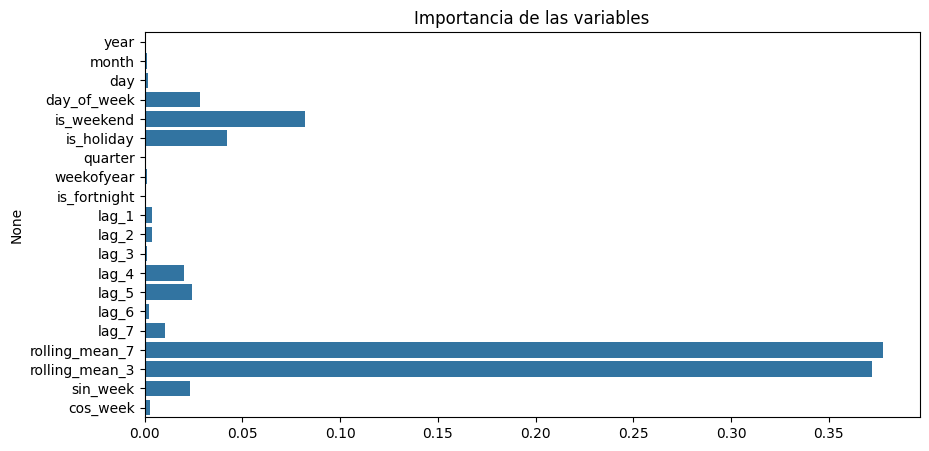

In [91]:
### Variables mas importantes
import matplotlib.pyplot as plt
import seaborn as sns

def plot_importance(model, features):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=model.feature_importances_, y=features.columns)
    plt.title("Importancia de las variables")
    plt.show()

plot_importance(xgb_model, x_train)

Ahora, generamos un modelo de regresión lineal con los datos de entrenamiento el cual procederemos a analizar.

In [92]:
### Modelo de regresion lineal
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

Tabla 16. Error medio absoluto del modelo de regresión lineal del conjunto de validación según las diferentes clases de accidentes para el modelo predictivo diario.

In [93]:
y_pred = lr_model.predict(x_test)

# Convertir valores negativos a 0
y_pred = np.maximum(0, y_pred)
### Calcular MAE
print("MAE del modelo de regresión lineal para el conjunto de validación: ", mean_absolute_error(y_test, y_pred))


MAE del modelo de regresión lineal para el conjunto de validación:  2.0974626077706557


Finalmente, procedemos a realizar una comparación entre el error cuadrático medio del modelo de regresión lineal para los conjuntos de entrenamiento y validación tomando en cuenta el porcentaje de su cambio.

In [94]:
y_train_pred = lr_model.predict(x_train)
y_train_pred = np.maximum(0, y_train_pred)
print("MSE del modelo de regresión lineal para el conjunto de entrenamiento: ", mean_squared_error(y_train, y_train_pred))
print("MSE del modelo de regresión lineal para el conjunto de validación: ", mean_squared_error(y_test, y_pred))

### Porcentaje de cambio del MSE
print("Porcentaje de cambio del MSE: ", str(round(abs((mean_squared_error(y_test, y_pred) - mean_squared_error(y_train, y_train_pred))/mean_squared_error(y_train, y_train_pred)), 2)*100) + "%")


MSE del modelo de regresión lineal para el conjunto de entrenamiento:  16.720352798764527
MSE del modelo de regresión lineal para el conjunto de validación:  15.4318046111898
Porcentaje de cambio del MSE:  8.0%


In [95]:
import joblib


joblib.dump(lr_model, 'lr_model_diary.pkl')

['lr_model_diary.pkl']

### Entrenamiento del Modelo Predictivo - Mensual

Para empezar, agruparemos los datos según el mes el año y el tipo de accidente. Tomaremos los valores de los accidentes, los sumaremos para tener un total y lo almacenaremos en la columna 'accidentes'. Además de eso, calcularemos la cantidad de de accidentes que sucedieron en un día feriado y los almacenaremos en la columna 'is_holiday'.

Tabla 17. Datos agrupados por año, mes y tipo de accidente.

In [96]:
### Agrupar a nivel mensual y por tipo de accidente
df_month_pre = df.groupby(["year", "month", "day", "CLASE_ACCIDENTE"]).size().reset_index(name="accidentes")
df_month_pre["date"] = pd.to_datetime(df_month_pre[["year", "month", "day"]])

df_month_pre['is_holiday'] = df_month_pre.date.apply(lambda x: str(x) in co_holidays)

df_month = df_month_pre.groupby(["year", "month", "CLASE_ACCIDENTE"]).agg({"accidentes": "sum", "is_holiday": "sum"}).reset_index()

df_month

,year,month,CLASE_ACCIDENTE,accidentes,is_holiday
0,2014,7,atropello,408,1
1,2014,7,caída ocupante,371,1
2,2014,7,choque,2162,1
3,2014,7,incendio,1,1
4,2014,7,otro,385,1
...,...,...,...,...,...
394,2020,8,atropello,197,2
395,2020,8,caída ocupante,132,2
396,2020,8,choque,1473,2
397,2020,8,otro,255,2


Tabla 17, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Generaremos variables que nos brinden más información sobre nuestros datos y las agregaremos al dataframe. Estas columnas serán days_in_month (cantidad de días del mes) y num_weekends (numero de fines de semana del mes). Además de guardar el número de accidentes de los últimos 3 meses en las variables 'lag_1', 'lag_2' y 'lag_3' respectivamente, y el número de accidentes de los últimos 6 meses en la variable 'lag_6', así como el promedio de accidentes de los últimos 3 meses en 'rolling_mean_3'. 

Tabla 18. Visualización de datos después de adición de variables del modelo predictivo mensual.

In [97]:
### Creacion de variables de tiempo
df_month["date"] = pd.to_datetime(df_month['year'].astype(str) + '-' + df_month['month'].astype(str) + '-01')
df_month["days_in_month"] = df_month["date"].dt.daysinmonth
df_month["num_weekends"] = df_month["days_in_month"].apply(lambda x: x//7)

df_month = df_month.sort_values(["CLASE_ACCIDENTE", "date"]).reset_index(drop=True)

### Numero de accidentes en los ultimos 3 meses
df_month['lag_1'] = df_month.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(1).fillna(0).astype(int)
df_month['lag_2'] = df_month.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(2).fillna(0).astype(int)
df_month['lag_3'] = df_month.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(3).fillna(0).astype(int)

### Numero de accidentes hace 6 meses
df_month['lag_6'] = df_month.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(6).fillna(0).astype(int)

### Rolling mean de los ultimos 3 meses
df_month['rolling_mean_3'] = df_month.groupby(["CLASE_ACCIDENTE"])["accidentes"].rolling(3).mean().reset_index(0,drop=True).fillna(0).astype(int)


df_month.drop(["date"], axis=1, inplace=True)

df_month



,year,month,CLASE_ACCIDENTE,accidentes,is_holiday,days_in_month,num_weekends,lag_1,lag_2,lag_3,lag_6,rolling_mean_3
0,2014,7,atropello,408,1,31,4,0,0,0,0,0
1,2014,8,atropello,457,2,31,4,408,0,0,0,0
2,2014,9,atropello,431,0,30,4,457,408,0,0,432
3,2014,10,atropello,411,1,31,4,431,457,408,0,433
4,2014,11,atropello,387,2,30,4,411,431,457,0,409
...,...,...,...,...,...,...,...,...,...,...,...,...
394,2020,4,volcamiento,94,1,30,4,187,217,204,253,166
395,2020,5,volcamiento,137,2,31,4,94,187,217,189,139
396,2020,6,volcamiento,154,3,30,4,137,94,187,220,128
397,2020,7,volcamiento,199,1,31,4,154,137,94,204,163


Tabla 18, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Seleccionamos los valores de la columna accidentes para diferentes tipos de accidentes, como choque, atropello, caída ocupante, otro, volcamiento, incendio y almacenamos estos valores en variables separadas. Después concatenamos estas variables en values y se especifican las columnas al unir asignándoles nombres descriptivos, después se rellenan los valores NaN con ceros (0).

Tabla 19. Visualización de 'values' del modelo predictivo mensual.

In [98]:
### separar valores de clase de accidente en columnas
choque = df_month[df_month.CLASE_ACCIDENTE == "choque"].accidentes
atropello = df_month[df_month.CLASE_ACCIDENTE == "atropello"].accidentes
caida = df_month[df_month.CLASE_ACCIDENTE == "caída ocupante"].accidentes
otro = df_month[df_month.CLASE_ACCIDENTE == "otro"].accidentes
volcamiento = df_month[df_month.CLASE_ACCIDENTE == "volcamiento"].accidentes
incendio = df_month[df_month.CLASE_ACCIDENTE == "incendio"].accidentes
values = pd.concat([choque, atropello, caida, otro, volcamiento, incendio], axis=1, keys=['choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'])
values = values.fillna(0).astype(int)

values

,choque,atropello,caida,otro,volcamiento,incendio
148,2162,0,0,0,0,0
149,2468,0,0,0,0,0
150,2488,0,0,0,0,0
151,2453,0,0,0,0,0
152,2342,0,0,0,0,0
...,...,...,...,...,...,...
246,0,0,0,0,0,1
247,0,0,0,0,0,1
248,0,0,0,0,0,1
249,0,0,0,0,0,1


Tabla 19, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Tabla 20. Visualización de los datos al concatenarse con 'values' del modelo predictivo mensual.

In [99]:
df_month = pd.concat([df_month, values], axis=1)

df_month

,year,month,CLASE_ACCIDENTE,accidentes,is_holiday,days_in_month,num_weekends,lag_1,lag_2,lag_3,lag_6,rolling_mean_3,choque,atropello,caida,otro,volcamiento,incendio
0,2014,7,atropello,408,1,31,4,0,0,0,0,0,0,408,0,0,0,0
1,2014,8,atropello,457,2,31,4,408,0,0,0,0,0,457,0,0,0,0
2,2014,9,atropello,431,0,30,4,457,408,0,0,432,0,431,0,0,0,0
3,2014,10,atropello,411,1,31,4,431,457,408,0,433,0,411,0,0,0,0
4,2014,11,atropello,387,2,30,4,411,431,457,0,409,0,387,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2020,4,volcamiento,94,1,30,4,187,217,204,253,166,0,0,0,0,94,0
395,2020,5,volcamiento,137,2,31,4,94,187,217,189,139,0,0,0,0,137,0
396,2020,6,volcamiento,154,3,30,4,137,94,187,220,128,0,0,0,0,154,0
397,2020,7,volcamiento,199,1,31,4,154,137,94,204,163,0,0,0,0,199,0


Tabla 20, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Ahora, procedemos a generar los conjuntos de entrenamiento (x_train y y_train) y los de validación (x_text y y_test).

Tabla 21. Visualización de los datos dentro de 'x_train'.

In [100]:
### Creacion de las variables x_train, y_train, x_test, y_test
df_test = df_month[df_month.year == 2020]
df_train = df_month[df_month.year != 2020]


x_train = df_train.drop(['choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio', "CLASE_ACCIDENTE", "accidentes"], axis=1)
y_train = df_train[['choque']]

x_test = df_test.drop(['choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio', "CLASE_ACCIDENTE", "accidentes"], axis=1)
y_test = df_test[['choque']]

x_train

,year,month,is_holiday,days_in_month,num_weekends,lag_1,lag_2,lag_3,lag_6,rolling_mean_3
0,2014,7,1,31,4,0,0,0,0,0
1,2014,8,2,31,4,408,0,0,0,0
2,2014,9,0,30,4,457,408,0,0,432
3,2014,10,1,31,4,431,457,408,0,433
4,2014,11,2,30,4,411,431,457,0,409
...,...,...,...,...,...,...,...,...,...,...
386,2019,8,2,31,4,176,121,112,102,161
387,2019,9,0,30,4,186,176,121,87,180
388,2019,10,1,31,4,180,186,176,118,206
389,2019,11,2,30,4,253,180,186,112,207


Tabla 21, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Tabla 22. Visualización de los datos dentro de 'y_train'.

In [101]:
y_train

,choque
0,0
1,0
2,0
3,0
4,0
...,...
386,0
387,0
388,0
389,0


Tabla 22, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Realizamos un modelo de regresión lineal utilizando nuestros datos de entrenamiento y generamos una predicción de la variable 'x_test'.

In [102]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)


df_pred = pd.DataFrame(y_pred.astype('int'), columns=['Predictions'])

df_pred

,Predictions
0,115
1,154
2,205
3,26
4,-199
5,-242
6,-45
7,-106
8,132
9,151


Tabla 23. Error medio absoluto del modelo de regresión lineal del conjunto de validación según las diferentes clases de accidentes para el modelo predictivo mensual.

In [103]:
print("MAE del modelo de regresión lineal para el conjunto de validación: ", mean_absolute_error(y_test, y_pred))

MAE del modelo de regresión lineal para el conjunto de validación:  217.9664138102323


Finalmente, procedemos a realizar una comparación entre el error cuadrático medio del modelo de regresión lineal para los conjuntos de entrenamiento y validación tomando en cuenta el porcentaje de su cambio.

In [104]:
### MSE
print("MSE del modelo regresión lineal para el conjunto de entrenamiento: ", mean_squared_error(y_train, lr_model.predict(x_train)))
print("MSE del modelo Xgboost para el conjunto de validación: ", mean_squared_error(y_test, y_pred))

### Porcentaje de MSE
print("Porcentaje de cambio del MSE: ", str(round(abs((mean_squared_error(y_test, y_pred) - mean_squared_error(y_train, lr_model.predict(x_train)))/mean_squared_error(y_train, lr_model.predict(x_train))), 2) * 100) + "%")

MSE del modelo regresión lineal para el conjunto de entrenamiento:  44486.90415622427
MSE del modelo Xgboost para el conjunto de validación:  100381.36735571137
Porcentaje de cambio del MSE:  126.0%


In [105]:
import joblib

joblib.dump(lr_model, 'lr_model_monthly.pkl')

['lr_model_monthly.pkl']

### Entrenamiento del Modelo Predictivo - Semanal   

Tomando el dataframe anterior 'FECHA_ACCIDENTES' agrupamos los valores según el año , la semana del año y la clase de accidente para formar el dataframe 'df_week'.

Tabla 24. Datos agrupados por año, semana y tipo de accidente.

In [106]:
df['weekofyear'] = df['FECHA_ACCIDENTES'].dt.weekofyear

df_week = df.groupby(['year', 'weekofyear', 'CLASE_ACCIDENTE']).size().reset_index(name="accidentes")

df_week

,year,weekofyear,CLASE_ACCIDENTE,accidentes
0,2014,1,atropello,42
1,2014,1,caída ocupante,25
2,2014,1,choque,231
3,2014,1,otro,33
4,2014,1,volcamiento,10
...,...,...,...,...
1650,2020,36,atropello,10
1651,2020,36,caída ocupante,5
1652,2020,36,choque,62
1653,2020,36,otro,8


Tabla 24, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Procedemos con la creación de variables de tiempo adicionales, y su adición al dataframe 'df_week'.

Tabla 25. Visualización de datos después de adición de variables del modelo predictivo semanal.

In [107]:
### Creacion de variables de tiempo

### la semana tiene holidays
df_week["date"] = pd.to_datetime(df_week['year'].astype(str) + '-' + df_week['weekofyear'].astype(str) + '-1', format='%Y-%W-%w')
df_week['is_holiday'] = df_week.date.apply(lambda x: str(x) in co_holidays)
df_week

### la semana siguiente tiene holidays
df_week["date_next_week"] = df_week["date"] + pd.DateOffset(weeks=1)
df_week['is_holiday_next_week'] = df_week.date_next_week.apply(lambda x: str(x) in co_holidays)
df_week['is_holiday_next_week'].value_counts()

### Inicio o fin de mes
df_week["is_start_month"] = df_week["date"].dt.is_month_start
df_week["is_end_month"] = df_week["date"].dt.is_month_end

### Tiene quincena
df_week["is_fortnight"] = df_week["date"].dt.day.isin([15, 30])

df_week = df_week.sort_values(["CLASE_ACCIDENTE", "date"]).reset_index(drop=True)
### Ventanas Deslizantes de 3 semanas
df_week['lag_1'] = df_week.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(1).fillna(0)
df_week['lag_2'] = df_week.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(2).fillna(0)
df_week['lag_3'] = df_week.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(3).fillna(0)

### Ventanas Deslizantes de 52 semanas(1 año)
df_week['lag_52'] = df_week.groupby(["CLASE_ACCIDENTE"])["accidentes"].shift(52).fillna(0)

### Rolling mean de los ultimos 3 meses
df_week['rolling_mean_3'] = df_week.groupby(["CLASE_ACCIDENTE"])["accidentes"].rolling(3).mean().reset_index(0,drop=True).fillna(0)

df_week.drop(["date", "date_next_week"], axis=1, inplace=True)

df_week






,year,weekofyear,CLASE_ACCIDENTE,accidentes,is_holiday,is_holiday_next_week,is_start_month,is_end_month,is_fortnight,lag_1,lag_2,lag_3,lag_52,rolling_mean_3
0,2014,1,atropello,42,True,False,False,False,False,0.0,0.0,0.0,0.0,0.000000
1,2014,27,atropello,44,False,False,False,False,False,42.0,0.0,0.0,0.0,0.000000
2,2014,28,atropello,91,False,False,False,False,False,44.0,42.0,0.0,0.0,59.000000
3,2014,29,atropello,102,False,False,False,False,False,91.0,44.0,42.0,0.0,79.000000
4,2014,30,atropello,107,False,False,False,False,False,102.0,91.0,44.0,0.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,2020,32,volcamiento,40,False,True,False,False,False,48.0,43.0,36.0,32.0,43.666667
1651,2020,33,volcamiento,41,True,False,False,False,False,40.0,48.0,43.0,51.0,43.000000
1652,2020,34,volcamiento,65,False,False,False,False,False,41.0,40.0,48.0,37.0,48.666667
1653,2020,35,volcamiento,49,False,False,False,True,False,65.0,41.0,40.0,33.0,51.666667


Tabla 25, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Separamos los valores de las clases de accidente en columnas que agregamos al dataframe values.

Tabla 26. Visualización de valores de dataframe 'values' del modelo predictivo semanal.

In [108]:
### separar valores de clase de accidente en columnas
choque = df_week[df_week.CLASE_ACCIDENTE == "choque"].accidentes
atropello = df_week[df_week.CLASE_ACCIDENTE == "atropello"].accidentes
caida = df_week[df_week.CLASE_ACCIDENTE == "caída ocupante"].accidentes
otro = df_week[df_week.CLASE_ACCIDENTE == "otro"].accidentes
volcamiento = df_week[df_week.CLASE_ACCIDENTE == "volcamiento"].accidentes
incendio = df_week[df_week.CLASE_ACCIDENTE == "incendio"].accidentes
values = pd.concat([choque, atropello, caida, otro, volcamiento, incendio], axis=1, keys=['choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'])

values = values.fillna(0)

values

,choque,atropello,caida,otro,volcamiento,incendio
650,231.0,0.0,0.0,0.0,0.0,0.0
651,133.0,0.0,0.0,0.0,0.0,0.0
652,550.0,0.0,0.0,0.0,0.0,0.0
653,539.0,0.0,0.0,0.0,0.0,0.0
654,567.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1000,0.0,0.0,0.0,0.0,0.0,1.0
1001,0.0,0.0,0.0,0.0,0.0,1.0
1002,0.0,0.0,0.0,0.0,0.0,2.0
1003,0.0,0.0,0.0,0.0,0.0,1.0


Tabla 26, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Y continuamos concatenando el dataframe values con df_week.

Tabla 27. Visualización de los datos al concatenarse con 'values' del modelo predictivo semanal.

In [109]:
df_week_full = pd.concat([df_week, values], axis=1)

df_week_full

,year,weekofyear,CLASE_ACCIDENTE,accidentes,is_holiday,is_holiday_next_week,is_start_month,is_end_month,is_fortnight,lag_1,lag_2,lag_3,lag_52,rolling_mean_3,choque,atropello,caida,otro,volcamiento,incendio
0,2014,1,atropello,42,True,False,False,False,False,0.0,0.0,0.0,0.0,0.000000,0.0,42.0,0.0,0.0,0.0,0.0
1,2014,27,atropello,44,False,False,False,False,False,42.0,0.0,0.0,0.0,0.000000,0.0,44.0,0.0,0.0,0.0,0.0
2,2014,28,atropello,91,False,False,False,False,False,44.0,42.0,0.0,0.0,59.000000,0.0,91.0,0.0,0.0,0.0,0.0
3,2014,29,atropello,102,False,False,False,False,False,91.0,44.0,42.0,0.0,79.000000,0.0,102.0,0.0,0.0,0.0,0.0
4,2014,30,atropello,107,False,False,False,False,False,102.0,91.0,44.0,0.0,100.000000,0.0,107.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,2020,32,volcamiento,40,False,True,False,False,False,48.0,43.0,36.0,32.0,43.666667,0.0,0.0,0.0,0.0,40.0,0.0
1651,2020,33,volcamiento,41,True,False,False,False,False,40.0,48.0,43.0,51.0,43.000000,0.0,0.0,0.0,0.0,41.0,0.0
1652,2020,34,volcamiento,65,False,False,False,False,False,41.0,40.0,48.0,37.0,48.666667,0.0,0.0,0.0,0.0,65.0,0.0
1653,2020,35,volcamiento,49,False,False,False,True,False,65.0,41.0,40.0,33.0,51.666667,0.0,0.0,0.0,0.0,49.0,0.0


Tabla 27, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Ahora creamos las variables de entrenamiento y de prueba de los grupos de variables independiente y dependiente.

Tabla 28. Visualización de valores de 'x_train'.

In [110]:
### Creacion de las variables x_train, y_train, x_test, y_test
df_test = df_week_full[df_week_full.year == 2020]
df_train = df_week_full[df_week_full.year != 2020]

x_train = df_train.drop(["accidentes", "CLASE_ACCIDENTE", 'choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'], axis=1)
y_train = df_train[['choque']]

x_test = df_test.drop(["accidentes", "CLASE_ACCIDENTE", 'choque', 'atropello', 'caida', 'otro', 'volcamiento', 'incendio'], axis=1)
y_test = df_test[['choque']]

x_train

,year,weekofyear,is_holiday,is_holiday_next_week,is_start_month,is_end_month,is_fortnight,lag_1,lag_2,lag_3,lag_52,rolling_mean_3
0,2014,1,True,False,False,False,False,0.0,0.0,0.0,0.0,0.000000
1,2014,27,False,False,False,False,False,42.0,0.0,0.0,0.0,0.000000
2,2014,28,False,False,False,False,False,44.0,42.0,0.0,0.0,59.000000
3,2014,29,False,False,False,False,False,91.0,44.0,42.0,0.0,79.000000
4,2014,30,False,False,False,False,False,102.0,91.0,44.0,0.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1614,2019,48,False,False,False,False,False,48.0,54.0,31.0,28.0,50.333333
1615,2019,49,False,False,False,False,False,49.0,48.0,54.0,24.0,47.666667
1616,2019,50,False,False,False,False,False,46.0,49.0,48.0,32.0,48.000000
1617,2019,51,False,False,False,False,False,49.0,46.0,49.0,27.0,45.000000


Tabla 28, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Y generamos un modelo de regresión lineal para las variables de entrenamiento. Luego, se realiza una predicción de la variable 'x_test'.

In [111]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

# Convertir valores negativos a 0
y_pred = np.maximum(0, y_pred)

df_pred = pd.DataFrame(y_pred.astype('int'), columns=['Predictions'])

df_pred

,Predictions
0,0
1,10
2,24
3,25
4,35
...,...
177,0
178,0
179,0
180,0


Tabla 29. Error promedio absoluto del modelo de regresión lineal para el conjunto de validación del modelo predictivo semanal por clases de accidentes.

In [112]:
print("MAE del modelo de regresión lineal para el conjunto de validación: ", mean_absolute_error(y_test, y_pred))


MAE del modelo de regresión lineal para el conjunto de validación:  12.253131351434634


Finalmente, comparamos el error promedio cuadrático del modelo de regresión lineal de los conjuntos de entrenamiento y validación de las variables dependientes del modelo predictivo semanal.

In [113]:
y_train_pred = lr_model.predict(x_train)
y_train_pred = np.maximum(0, y_train_pred)
print("MSE del modelo de regresión lineal para el conjunto de entrenamiento: ", mean_squared_error(y_train, y_train_pred))
print("MSE del modelo de regresión lineal para el conjunto de validación: ", mean_squared_error(y_test, y_pred))

### Porcentaje de cambio del MSE
print("Porcentaje de cambio del MSE: ", str(round(abs((mean_squared_error(y_test, y_pred) - mean_squared_error(y_train, y_train_pred))/mean_squared_error(y_train, y_train_pred)), 2)*100) + "%")


MSE del modelo de regresión lineal para el conjunto de entrenamiento:  539.3619793463566
MSE del modelo de regresión lineal para el conjunto de validación:  512.8384624634871
Porcentaje de cambio del MSE:  5.0%


In [114]:
joblib.dump(lr_model, 'lr_model_weekly.pkl')

['lr_model_weekly.pkl']

## Anexos

Aplicación Web: https://britop12-incidentes-viales-med-inicio-vehpnb.streamlit.app

Video promocional: https://youtu.be/0UH8-w3cx7g?si=ltf5K0kS2hROEODg

Reporte técnico: https://deepnote.com/@dioselin-esteban-brito-penaloza/Fundamentos-de-Analitica-9bf70f57-8204-4e96-942e-40df61245296

Repositorio: https://github.com/britop12/incidentes_viales_med

## Conclusiones

Conclusiones del Trabajo:


Análisis de Datos y Variables Relevantes:

La variable objetivo, la accidentalidad, está mayormente compuesta por "choques" (67%), seguido por accidentes relacionados con el diseño de la vía, especialmente en "tramos de vía" (69% de los accidentes por diseño).
Durante el año 2020, se observó una reducción significativa en el número de accidentes, casi la mitad con respecto al año anterior. Se sugiere que este descenso podría estar vinculado a las restricciones y cambios en la movilidad debido a la pandemia.
La distribución de los resultados de los accidentes indica que la mayoría de estos eventos resultan en heridos (55.4%), mientras que un porcentaje muy bajo conlleva a la muerte (menos del 1%). Además, el 44% de los accidentes solo resultan en daños materiales a los vehículos.


Patrones Temporales y Espaciales:

Los meses con más accidentes son destacados, siendo agosto el de mayor accidentalidad.
Los viernes presentan la mayor cantidad de accidentes, mientras que los domingos son los días con menos accidentalidad.
Las horas de 6 a 19 muestran la mayor incidencia de accidentes, con picos notables a las 7, 12 y 17 horas.
El análisis geoespacial revela que las zonas del centro de la ciudad experimentan una mayor accidentalidad, disminuyendo hacia las periferias.


Variables Relevantes para el Modelo:

Según el modelo XGBoost, las variables "rolling_mean_7" y "rolling_mean_3" son las más importantes en la predicción de la accidentalidad. Esto sugiere que las tendencias a corto y largo plazo influyen significativamente en la ocurrencia de accidentes.


Evaluación del Modelo Predictivo:

El modelo de regresión lineal para la predicción diaria tiene un MAE de 2.10 en el conjunto de validación. El MSE muestra un cambio del 8% entre el conjunto de entrenamiento y validación, indicando un buen desempeño y evitando el sobreentrenamiento.
Para la predicción mensual, el modelo de regresión lineal tiene un MAE de 217.97 en el conjunto de validación, pero el modelo XGBoost muestra un aumento significativo del 126% en el MSE. Esto puede indicar una mayor complejidad en la predicción mensual que podría necesitar ajustes en el modelo.
En la predicción semanal, el modelo de regresión lineal tiene un MAE de 12.25 en el conjunto de validación, y el MSE muestra un cambio del 5%. Este modelo parece tener un buen rendimiento en la predicción semanal.


Agrupamiento de Barrios:

Se identificaron los barrios con mayor accidentalidad, siendo La Candelaria, Campo Amor y Perpetuo Socorro los más afectados.
El agrupamiento de barrios según su accidentalidad puede proporcionar información valiosa para intervenciones específicas. Es crucial evaluar la utilidad de estos grupos y desarrollar planes de acción adaptados a las características de cada grupo de barrios.


En resumen, este trabajo ofrece una comprensión profunda de la accidentalidad en Medellín, proporcionando herramientas predictivas y de agrupamiento que pueden ser fundamentales para la toma de decisiones y la implementación de estrategias efectivas de prevención de accidentes en la ciudad.


## Referencias

https://www.http://medata.gov.co/

http://medata.gov.co/dataset/incidentes-viales

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9bf70f57-8204-4e96-942e-40df61245296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>